In [1]:
from scipy.signal import welch
from decode_lab_code.readers.ioreaders import load_nwb
import matplotlib.pyplot as plt
import numpy as np
import pynapple as nap
from decode_lab_code.core.base import base
from decode_lab_code.readers.ioreaders import read_nlx
import pandas as pd

Cite pynwb, neo, and CatalystNeuro team
Please note, if there are multiple start/stops, more data is collected after a stopping recording. You must trim the CSC.
TODO: MUST CHECK ALL SLICING FOR [a:b], MUST BE [a::b]


In [2]:
from decode_lab_code.analyze.spectral import spectral

Cite Pynapple and PYNWB


In [3]:
nwbpath = '/Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwbfile.nwb'

In [4]:
self = spectral(nwbpath)

     start_time    stop_time    tags
id                                  
0   8145.353771  8446.868771  [rec0]
1   8491.112771  9466.121771  [rec1]
Reformatting CSC pandas series (TsdFrame). This may take a few minutes...


/Users/js0403/anaconda3/envs/decode_lab_env/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/js0403/anaconda3/envs/decode_lab_env/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


KeyboardInterrupt: 

Restarted decode_lab_env (Python 3.9.18)

In [1]:
from scipy.signal import welch
from decode_lab_code.readers.ioreaders import load_nwb
import matplotlib.pyplot as plt
import numpy as np
import pynapple as nap
from decode_lab_code.core.base import base
from decode_lab_code.readers.ioreaders import read_nlx
import pandas as pd

Cite pynwb, neo, and CatalystNeuro team
Please note, if there are multiple start/stops, more data is collected after a stopping recording. You must trim the CSC.
TODO: MUST CHECK ALL SLICING FOR [a:b], MUST BE [a::b]


In [2]:
from decode_lab_code.analyze.spectral import spectral

Cite Pynapple and PYNWB


In [3]:
nwbpath = '/Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwbfile.nwb'

In [4]:
self = spectral(nwbpath)

     start_time    stop_time    tags
id                                  
0   8145.353771  8446.868771  [rec0]
1   8491.112771  9466.121771  [rec1]


In [5]:
self.nwbfile = load_nwb(nwbpath=nwbpath)
self.events = self.nwbfile.epochs.to_dataframe()
self.csc_data_names = self.nwbfile.electrodes.to_dataframe()['label']
#self.rec_times = self.csc_data[0].time_support        

print(self.events)
# get unit data

self.unit_data = nap.load_file(nwbpath)['units']
# get csc data

csc_data = nap.load_file(nwbpath)['ElectricalSeries']
csc_times = self.nwbfile.acquisition['ElectricalSeries'].timestamps[:]

     start_time    stop_time    tags
id                                  
0   8145.353771  8446.868771  [rec0]
1   8491.112771  9466.121771  [rec1]


In [6]:
csc_data = nap.load_file(nwbpath)['ElectricalSeries']
csc_times = self.nwbfile.acquisition['ElectricalSeries'].timestamps[:]

In [7]:
csc_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Time (s),,,,,,,,,,,,,,,,
8145.353771,-22.797327,-26.459549,-18.524736,-25.849178,8.728294,-80.355240,28.595844,-35.370953,-29.236732,-78.859833,-97.323532,-69.429611,-2.990814,1.159703,-2.044740,39.826656
8145.353802,-25.513475,-28.229622,-16.113773,-26.276438,24.201180,-80.843536,27.802362,-33.173622,-31.678213,-68.758202,-85.024567,-58.534504,3.967406,5.706962,-4.425184,35.981323
8145.353834,-17.334515,-29.419844,-17.700735,-27.100437,20.111698,-92.257454,28.565325,-35.340435,-34.424881,-59.633171,-78.981903,-56.855984,-1.190222,6.347850,-8.606220,25.513475
8145.353865,-6.897183,-29.236732,-20.355846,-27.771845,1.678518,-103.274643,28.015993,-41.993469,-33.906067,-54.078800,-85.970642,-65.065468,-13.092441,1.861629,-10.528886,21.362957
8145.353896,-9.491257,-29.786066,-23.895994,-27.893919,-12.390515,-108.432266,25.696587,-46.357616,-31.586658,-51.576283,-96.346939,-81.850647,-21.820734,-3.082370,-8.270516,23.651846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466.121646,-2.075259,-0.854518,-25.727104,8.392591,-2.655110,42.634357,-28.443253,20.447401,33.234657,11.139256,26.490067,3.387555,51.698357,42.695396,18.463699,34.516434
9466.121677,-1.068148,-5.340739,-26.123844,7.324442,-3.418073,37.842953,-31.037325,20.203255,32.959991,17.761772,19.409773,12.085330,37.720879,34.577473,9.338664,32.685326
9466.121709,1.037629,-9.613331,-22.370068,6.958220,-3.173925,38.087101,-26.245918,25.666067,38.178658,28.656881,22.064882,26.093327,37.171547,24.292734,6.317332,32.135990


In [8]:
start_time = self.nwbfile.epochs.to_dataframe()['start_time'][0]
end_time = self.nwbfile.epochs.to_dataframe()['stop_time'][0]
temp_data = csc_data[0].data()
numsamples = len(temp_data[np.where(csc_times==start_time)[0][0]:np.where(csc_times==end_time)[0][0]])
self.fs = np.round(numsamples/(end_time-start_time)).astype(float)

In [9]:
self.fs

32000.0

In [10]:
start_times = [i for i in self.events.start_time] # get times
end_times = [i for i in self.events.stop_time] # get times
start_idx = []; end_idx = []
for i in start_times:
    start_idx.append(np.where(csc_times==i))

for i in end_times:
    end_idx.append(np.where(csc_times==i))
# sanity check

if len(start_times) != len(end_times):
    ValueError("start_times do not match end times - something is wrong with the recording or extraction")
# organize data into pandas array (TsdFrame) - organizing features are recording, time(neuralynx), time(sec)
# TODO: Include helper functions to include epochs

rec_var = np.zeros(csc_data.shape[0])
for i in range(len(start_times)):
    rec_var[start_idx[i][0][0]:end_idx[i][0][0]+1]=i+1

In [11]:
import matplotlib.pyplot as plt

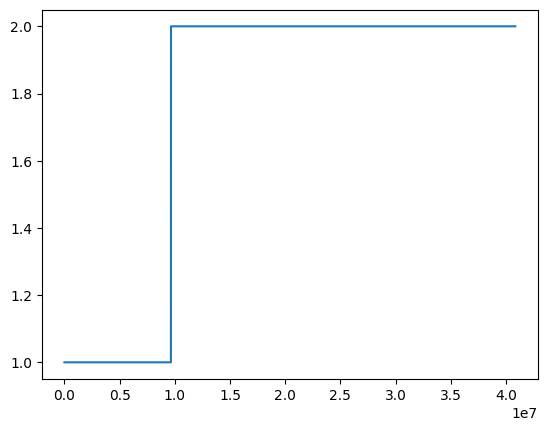

In [12]:
plt.plot(rec_var)

In [13]:
csc_data.index.name = 'Time (neuralynx)'

In [14]:
csc_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Time (neuralynx),,,,,,,,,,,,,,,,
8145.353771,-22.797327,-26.459549,-18.524736,-25.849178,8.728294,-80.355240,28.595844,-35.370953,-29.236732,-78.859833,-97.323532,-69.429611,-2.990814,1.159703,-2.044740,39.826656
8145.353802,-25.513475,-28.229622,-16.113773,-26.276438,24.201180,-80.843536,27.802362,-33.173622,-31.678213,-68.758202,-85.024567,-58.534504,3.967406,5.706962,-4.425184,35.981323
8145.353834,-17.334515,-29.419844,-17.700735,-27.100437,20.111698,-92.257454,28.565325,-35.340435,-34.424881,-59.633171,-78.981903,-56.855984,-1.190222,6.347850,-8.606220,25.513475
8145.353865,-6.897183,-29.236732,-20.355846,-27.771845,1.678518,-103.274643,28.015993,-41.993469,-33.906067,-54.078800,-85.970642,-65.065468,-13.092441,1.861629,-10.528886,21.362957
8145.353896,-9.491257,-29.786066,-23.895994,-27.893919,-12.390515,-108.432266,25.696587,-46.357616,-31.586658,-51.576283,-96.346939,-81.850647,-21.820734,-3.082370,-8.270516,23.651846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466.121646,-2.075259,-0.854518,-25.727104,8.392591,-2.655110,42.634357,-28.443253,20.447401,33.234657,11.139256,26.490067,3.387555,51.698357,42.695396,18.463699,34.516434
9466.121677,-1.068148,-5.340739,-26.123844,7.324442,-3.418073,37.842953,-31.037325,20.203255,32.959991,17.761772,19.409773,12.085330,37.720879,34.577473,9.338664,32.685326
9466.121709,1.037629,-9.613331,-22.370068,6.958220,-3.173925,38.087101,-26.245918,25.666067,38.178658,28.656881,22.064882,26.093327,37.171547,24.292734,6.317332,32.135990


In [15]:
self.events

,start_time,stop_time,tags
id,,,
0,8145.353771,8446.868771,[rec0]
1,8491.112771,9466.121771,[rec1]


In [16]:
self.csc_data = csc_data

In [17]:
self.csc_data.index.name = 'Time (neuralynx)'

In [18]:
rec_var

array([1., 1., 1., ..., 2., 2., 2.])

In [19]:
self.csc_data.insert(loc=0,column="Recording",value=rec_var)

/Users/js0403/anaconda3/envs/decode_lab_env/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [20]:
self.csc_data

,Recording,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Time (neuralynx),,,,,,,,,,,,,,,,,
8145.353771,1.0,-22.797327,-26.459549,-18.524736,-25.849178,8.728294,-80.355240,28.595844,-35.370953,-29.236732,-78.859833,-97.323532,-69.429611,-2.990814,1.159703,-2.044740,39.826656
8145.353802,1.0,-25.513475,-28.229622,-16.113773,-26.276438,24.201180,-80.843536,27.802362,-33.173622,-31.678213,-68.758202,-85.024567,-58.534504,3.967406,5.706962,-4.425184,35.981323
8145.353834,1.0,-17.334515,-29.419844,-17.700735,-27.100437,20.111698,-92.257454,28.565325,-35.340435,-34.424881,-59.633171,-78.981903,-56.855984,-1.190222,6.347850,-8.606220,25.513475
8145.353865,1.0,-6.897183,-29.236732,-20.355846,-27.771845,1.678518,-103.274643,28.015993,-41.993469,-33.906067,-54.078800,-85.970642,-65.065468,-13.092441,1.861629,-10.528886,21.362957
8145.353896,1.0,-9.491257,-29.786066,-23.895994,-27.893919,-12.390515,-108.432266,25.696587,-46.357616,-31.586658,-51.576283,-96.346939,-81.850647,-21.820734,-3.082370,-8.270516,23.651846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466.121646,2.0,-2.075259,-0.854518,-25.727104,8.392591,-2.655110,42.634357,-28.443253,20.447401,33.234657,11.139256,26.490067,3.387555,51.698357,42.695396,18.463699,34.516434
9466.121677,2.0,-1.068148,-5.340739,-26.123844,7.324442,-3.418073,37.842953,-31.037325,20.203255,32.959991,17.761772,19.409773,12.085330,37.720879,34.577473,9.338664,32.685326
9466.121709,2.0,1.037629,-9.613331,-22.370068,6.958220,-3.173925,38.087101,-26.245918,25.666067,38.178658,28.656881,22.064882,26.093327,37.171547,24.292734,6.317332,32.135990


In [21]:
len(start_times)

2

In [22]:
np.where(rec_var==1.0)

(array([      0,       1,       2, ..., 9648478, 9648479, 9648480]),)

In [23]:
len(np.where(rec_var==1.0))

1

In [24]:
np.where(rec_var==1.0).shape

AttributeError: 'tuple' object has no attribute 'shape'

In [25]:
np.where(rec_var==1.0)[0]

array([      0,       1,       2, ..., 9648478, 9648479, 9648480])

In [26]:
np.where(rec_var==1.0)[0].shape

(9648481,)

In [27]:
np.where(rec_var==1.0)[0].shape[0]

9648481

In [28]:
np.where(rec_var==1.0)[0].shape[0]/self.fs

301.51503125

In [29]:
rec_var = np.zeros(csc_data.shape[0]); times = []
for i in range(len(start_times)):
    rec_var[start_idx[i][0][0]:end_idx[i][0][0]+1]=i+1
    numsamples = np.where(rec_var==1.0)[0].shape[0]
    times[i] = np.linspace(0,numsamples/self.fs,numsamples)

IndexError: list assignment index out of range

In [30]:
np.where(rec_var==1.0)[0].shape[0]

9648481

In [31]:
self.fs

32000.0

In [32]:
numsamples/self.fs

301.51503125

In [33]:
numsamples

9648481

In [34]:
np.linspace(0,numsamples/self.fs,numsamples)

array([0.00000000e+00, 3.12500032e-05, 6.25000065e-05, ...,
       3.01514969e+02, 3.01515000e+02, 3.01515031e+02])

In [35]:
times = []

In [36]:
times[i] = np.linspace(0,numsamples/self.fs,numsamples)

IndexError: list assignment index out of range

In [37]:
numsamples/self.fs

301.51503125

In [38]:
times[i]

IndexError: list index out of range

In [39]:
np.linspace(0,numsamples/self.fs,numsamples)

array([0.00000000e+00, 3.12500032e-05, 6.25000065e-05, ...,
       3.01514969e+02, 3.01515000e+02, 3.01515031e+02])

In [40]:
rec_var = np.zeros(csc_data.shape[0]); times = []
for i in range(len(start_times)):
    rec_var[start_idx[i][0][0]:end_idx[i][0][0]+1]=i+1
    numsamples = np.where(rec_var==1.0)[0].shape[0]
    times.append(np.linspace(0,numsamples/self.fs,numsamples))

In [41]:
times

[array([0.00000000e+00, 3.12500032e-05, 6.25000065e-05, ...,
        3.01514969e+02, 3.01515000e+02, 3.01515031e+02]),
 array([0.00000000e+00, 3.12500032e-05, 6.25000065e-05, ...,
        3.01514969e+02, 3.01515000e+02, 3.01515031e+02])]

In [42]:
float(i)

1.0

In [43]:
rec_var = np.zeros(csc_data.shape[0]); times = []
for i in range(len(start_times)):
    rec_var[start_idx[i][0][0]:end_idx[i][0][0]+1]=i+1
    numsamples = np.where(rec_var==float(i+1))[0].shape[0]
    times.append(np.linspace(0,numsamples/self.fs,numsamples))

In [44]:
times

[array([0.00000000e+00, 3.12500032e-05, 6.25000065e-05, ...,
        3.01514969e+02, 3.01515000e+02, 3.01515031e+02]),
 array([0.00000000e+00, 3.12500010e-05, 6.25000020e-05, ...,
        9.75008969e+02, 9.75009000e+02, 9.75009031e+02])]

In [45]:
times_data = np.hstack(times)

In [46]:
times_data

array([0.00000000e+00, 3.12500032e-05, 6.25000065e-05, ...,
       9.75008969e+02, 9.75009000e+02, 9.75009031e+02])

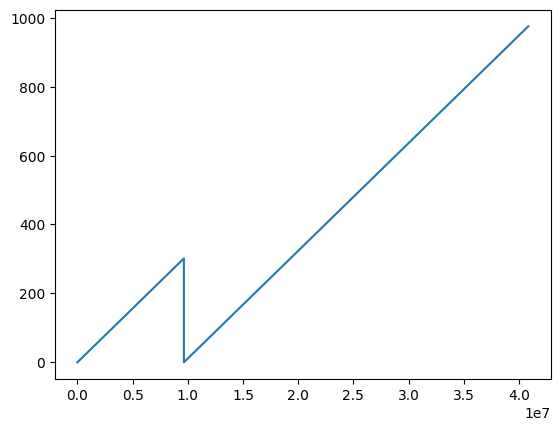

In [47]:
plt.plot(times_data)

In [48]:
times_data

array([0.00000000e+00, 3.12500032e-05, 6.25000065e-05, ...,
       9.75008969e+02, 9.75009000e+02, 9.75009031e+02])

In [49]:
times_data[0]

0.0

In [50]:
self.csc_data = csc_data
self.csc_data.index.name = 'Time (neuralynx)'
self.csc_data.insert(loc=0,column="Recording",value=rec_var)
self.csc_data.insert(loc=0,column="Time (sec)",value=times_data)

ValueError: cannot insert Recording, already exists

In [51]:
self.csc_data

,Recording,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Time (neuralynx),,,,,,,,,,,,,,,,,
8145.353771,1.0,-22.797327,-26.459549,-18.524736,-25.849178,8.728294,-80.355240,28.595844,-35.370953,-29.236732,-78.859833,-97.323532,-69.429611,-2.990814,1.159703,-2.044740,39.826656
8145.353802,1.0,-25.513475,-28.229622,-16.113773,-26.276438,24.201180,-80.843536,27.802362,-33.173622,-31.678213,-68.758202,-85.024567,-58.534504,3.967406,5.706962,-4.425184,35.981323
8145.353834,1.0,-17.334515,-29.419844,-17.700735,-27.100437,20.111698,-92.257454,28.565325,-35.340435,-34.424881,-59.633171,-78.981903,-56.855984,-1.190222,6.347850,-8.606220,25.513475
8145.353865,1.0,-6.897183,-29.236732,-20.355846,-27.771845,1.678518,-103.274643,28.015993,-41.993469,-33.906067,-54.078800,-85.970642,-65.065468,-13.092441,1.861629,-10.528886,21.362957
8145.353896,1.0,-9.491257,-29.786066,-23.895994,-27.893919,-12.390515,-108.432266,25.696587,-46.357616,-31.586658,-51.576283,-96.346939,-81.850647,-21.820734,-3.082370,-8.270516,23.651846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466.121646,2.0,-2.075259,-0.854518,-25.727104,8.392591,-2.655110,42.634357,-28.443253,20.447401,33.234657,11.139256,26.490067,3.387555,51.698357,42.695396,18.463699,34.516434
9466.121677,2.0,-1.068148,-5.340739,-26.123844,7.324442,-3.418073,37.842953,-31.037325,20.203255,32.959991,17.761772,19.409773,12.085330,37.720879,34.577473,9.338664,32.685326
9466.121709,2.0,1.037629,-9.613331,-22.370068,6.958220,-3.173925,38.087101,-26.245918,25.666067,38.178658,28.656881,22.064882,26.093327,37.171547,24.292734,6.317332,32.135990


In [52]:
self.csc_data.insert(loc=0,column="Time (sec)",value=times_data)

In [53]:
self.csc_data